In [339]:
import cv2, matplotlib
from matplotlib import pyplot as plt
matplotlib.rcParams['image.cmap'] = 'gray'
import numpy as np

In [340]:
shapes = cv2.imread('shapes.jpg')
shapes_gray = cv2.cvtColor(shapes, cv2.COLOR_RGB2GRAY)

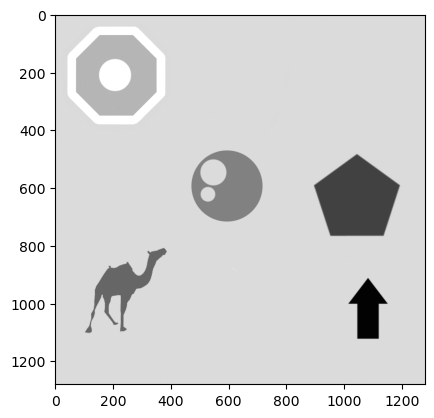

In [341]:
plt.imshow(shapes_gray)

In [342]:
ret, shapes_mask = cv2.threshold(shapes_gray , 200, 250, cv2.THRESH_BINARY_INV )

In [343]:
shapes_full = shapes.copy()
shapes_outer = shapes.copy()
shapes_nth = shapes.copy()
shapes_diff_color = shapes.copy()
shapes_center = shapes.copy()
shapes_rect = shapes.copy()
shapes_box = shapes.copy()

In [344]:
contours , hieracy = cv2.findContours(shapes_mask, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
final_shapes = cv2.drawContours(shapes_full, contours, -1, (0,0,255), 3)


Text(0.5, 1.0, 'Total number For All Contours: 8')

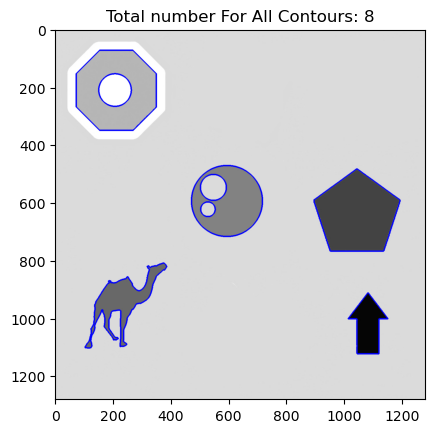

In [345]:
plt.imshow(final_shapes)
plt.title('Total number For All Contours: ' + str(len(contours)))

Text(0.5, 1.0, 'Total number For All Contours: 5')

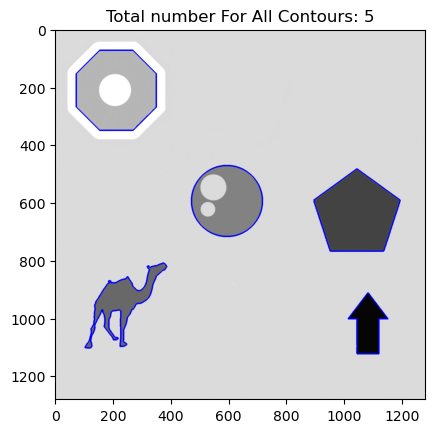

In [346]:
contours_outer , hieracy = cv2.findContours(shapes_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
final_shapes_outer = cv2.drawContours(shapes_outer, contours_outer, -1, (0,0,255), 4)
plt.imshow(final_shapes_outer)
plt.title('Total number For All Contours: ' + str(len(contours_outer)))

Text(0.5, 1.0, 'Total number For All Contours: 5')

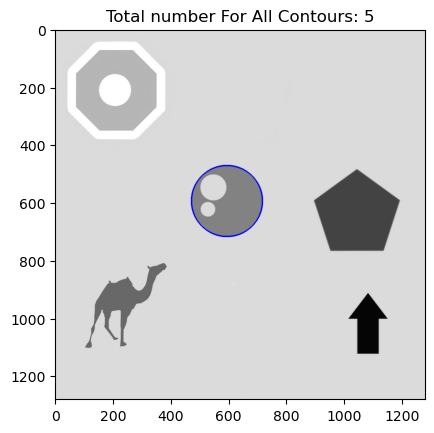

In [347]:
contours_nth , hieracy = cv2.findContours(shapes_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
final_shapes_nth = cv2.drawContours(shapes_nth, contours_nth[3], -1, (0,0,255), 4)
plt.imshow(final_shapes_nth)
plt.title('Total number For All Contours: ' + str(len(contours_nth)))

In [348]:
def convert(hsv):
    pixel = np.uint8([[hsv]])
    return tuple(int(i) for i in cv2.cvtColor(pixel, cv2.COLOR_HSV2BGR).flatten())

for i, contours_i in enumerate(contours_nth):
    hsv = (i*180/len(contours_nth), 255, 255)
    cv2.drawContours(shapes_diff_color, contours_nth[i], -1, convert(hsv),5 )

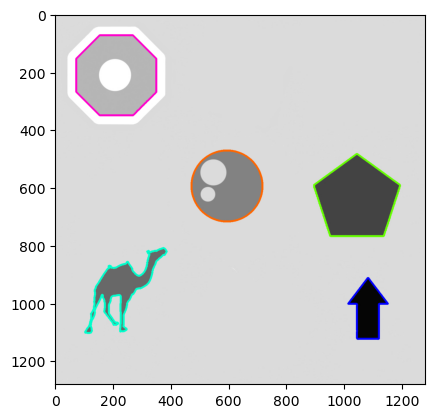

In [349]:
plt.imshow(shapes_diff_color)

In [350]:
contours , hieracy = cv2.findContours(shapes_mask, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(shapes_center, contours, -1, (0,0,255), 3)

array([[[219, 219, 219],
        [219, 219, 219],
        [219, 219, 219],
        ...,
        [219, 219, 219],
        [219, 219, 219],
        [219, 219, 219]],

       [[219, 219, 219],
        [219, 219, 219],
        [219, 219, 219],
        ...,
        [219, 219, 219],
        [219, 219, 219],
        [219, 219, 219]],

       [[219, 219, 219],
        [219, 219, 219],
        [219, 219, 219],
        ...,
        [219, 219, 219],
        [219, 219, 219],
        [219, 219, 219]],

       ...,

       [[219, 219, 219],
        [219, 219, 219],
        [219, 219, 219],
        ...,
        [219, 219, 219],
        [219, 219, 219],
        [219, 219, 219]],

       [[219, 219, 219],
        [219, 219, 219],
        [219, 219, 219],
        ...,
        [219, 219, 219],
        [219, 219, 219],
        [219, 219, 219]],

       [[219, 219, 219],
        [219, 219, 219],
        [219, 219, 219],
        ...,
        [219, 219, 219],
        [219, 219, 219],
        [219, 219, 219]]

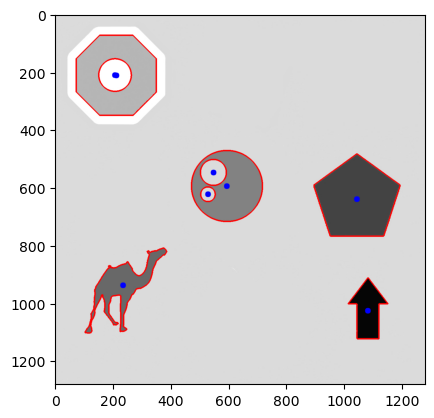

In [351]:
for cnt in contours:
    m = cv2.moments(cnt)
    x = int(round(m['m10']/m['m00']))
    y = int(round(m['m01']/m['m00']))
    
    cv2.circle(shapes_center, (x,y), 10, (255, 0,0), -1)

plt.imshow(shapes_center[:, :, ::-1])

In [352]:
for index, cnt in enumerate(contours):
    area = cv2.contourArea(cnt)
    perimeter = cv2.arcLength(cnt, True)
    print('Contour', index, 'has Contour Area:', area,'& Contour Perimeter: ', perimeter )

Contour 0 has Contour Area: 15451.0 & Contour Perimeter:  619.6467478275299
Contour 1 has Contour Area: 22834.0 & Contour Perimeter:  1597.5920510292053
Contour 2 has Contour Area: 1989.0 & Contour Perimeter:  166.8528118133545
Contour 3 has Contour Area: 6305.0 & Contour Perimeter:  295.07820892333984
Contour 4 has Contour Area: 59085.0 & Contour Perimeter:  971.0336074829102
Contour 5 has Contour Area: 47425.0 & Contour Perimeter:  813.6366424560547
Contour 6 has Contour Area: 9952.0 & Contour Perimeter:  373.50461435317993
Contour 7 has Contour Area: 63666.5 & Contour Perimeter:  926.9919943809509


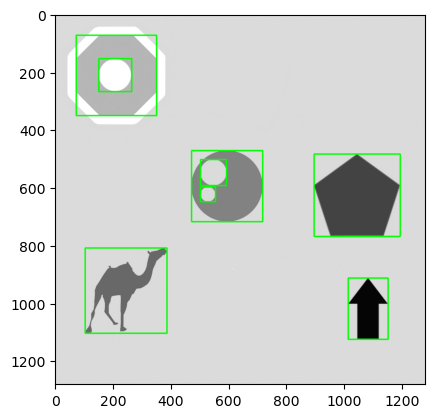

In [353]:
for index, cnt in enumerate(contours):
    x, y, w, h = cv2.boundingRect(cnt)
    cv2.rectangle(shapes_rect, (x, y), (x+w, y+h), (0,255, 0), 4)
plt.imshow(shapes_rect[:,:,::-1])

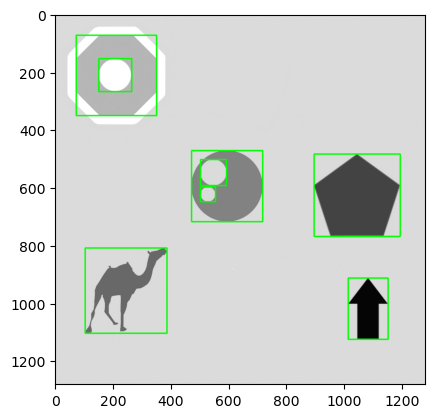

In [354]:
for cnt in contours:
    box = cv2.minAreaRect(cnt)
    boxpts = np.int0(cv2.boxPoints(box))
    cv2.drawContours(shapes_box, [boxpts], -1, (0,0, 255), 4)
plt.imshow(shapes_rect[:,:,::-1])